# Additional Comparative Study

### Part A

In [1]:
# Importing the packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, BayesianRidge 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    r2_score,
    mean_squared_error,
    mean_absolute_error
)

In [2]:
# Reading the data

dat = pd.read_csv('CE802_P3_Data.csv')

# working on a copy

p3_dat = dat.copy()

print("Data Dimensions:", p3_dat.shape)

Data Dimensions: (1400, 35)


In [3]:
p3_dat.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,USA,-48.20,315.96,Very high,5570.88,6.27,-312.93,-16.65,-58.22,44.07,...,-489.08,232.92,-2216.88,55.62,4.82,15875.29,7.74,-2128.09,-2070.68,509.59
1,Europe,-75.20,162.15,Very high,6124.62,2.52,-318.66,-11.73,-53.51,70.83,...,-668.18,281.40,-2459.44,51.30,4.34,16457.48,12.78,-2364.44,-2539.32,-8.93
2,UK,-62.12,346.29,Very high,12506.61,-2.85,-257.34,-1.26,-79.76,65.64,...,-402.94,68.31,-2193.54,47.36,10.54,16357.37,30.81,-2157.30,-716.58,-8.93
3,Europe,-70.74,280.32,Medium,20098.20,9.33,-175.35,-7.31,-90.70,63.72,...,-1177.00,210.12,-1744.52,45.98,3.70,9928.80,3.93,-1996.30,-2105.34,22.18
4,Europe,-63.00,264.69,Very low,13388.76,3.30,-195.51,-6.98,-126.49,56.10,...,15.94,306.99,-2628.38,36.42,7.92,20893.27,6.30,-1937.30,-3366.82,170.98


In [4]:
p3_dat.describe().T

,count,mean,std,min,25%,50%,75%,max
F2,1400.0,-70.299814,8.608240,-142.96,-74.3400,-70.140,-66.1750,-31.90
F3,1400.0,200.416864,132.110502,-376.80,133.8525,200.655,262.1850,887.07
F5,1400.0,22542.739736,8898.976307,-4025.07,16403.3100,22702.650,28688.2650,51163.98
F6,1400.0,6.143893,12.958121,-54.99,-0.3900,6.015,12.4350,85.59
F7,1400.0,-277.502850,91.500104,-559.95,-340.0200,-277.695,-213.0225,15.30
F8,1400.0,-8.500821,3.061879,-17.59,-10.6325,-8.550,-6.3600,3.73
F9,1400.0,-78.977129,30.591408,-176.19,-100.1400,-78.815,-59.0025,24.90
F10,1400.0,57.206186,11.915907,11.67,51.0600,57.360,63.7200,114.78
F11,1400.0,436.422150,932.217719,-3298.53,-180.0000,437.790,1086.3900,3128.43
F12,1400.0,-1371.397993,914.312976,-4954.56,-1963.1250,-1360.875,-753.5700,1356.21


In [5]:
p3_dat.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

<AxesSubplot:>

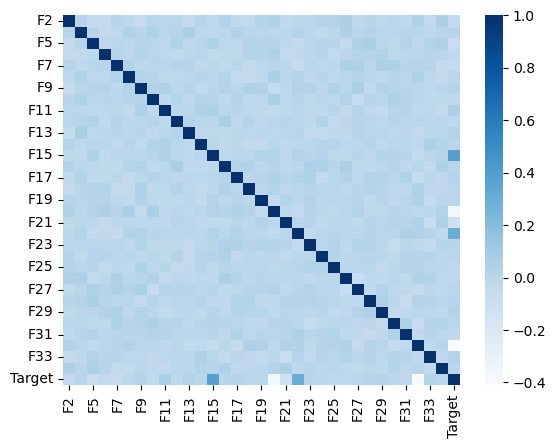

In [6]:
# correlation computation between features

correlation1 = p3_dat.corr()
sns.heatmap(correlation1, annot=False, cmap='Blues')

Data skewness



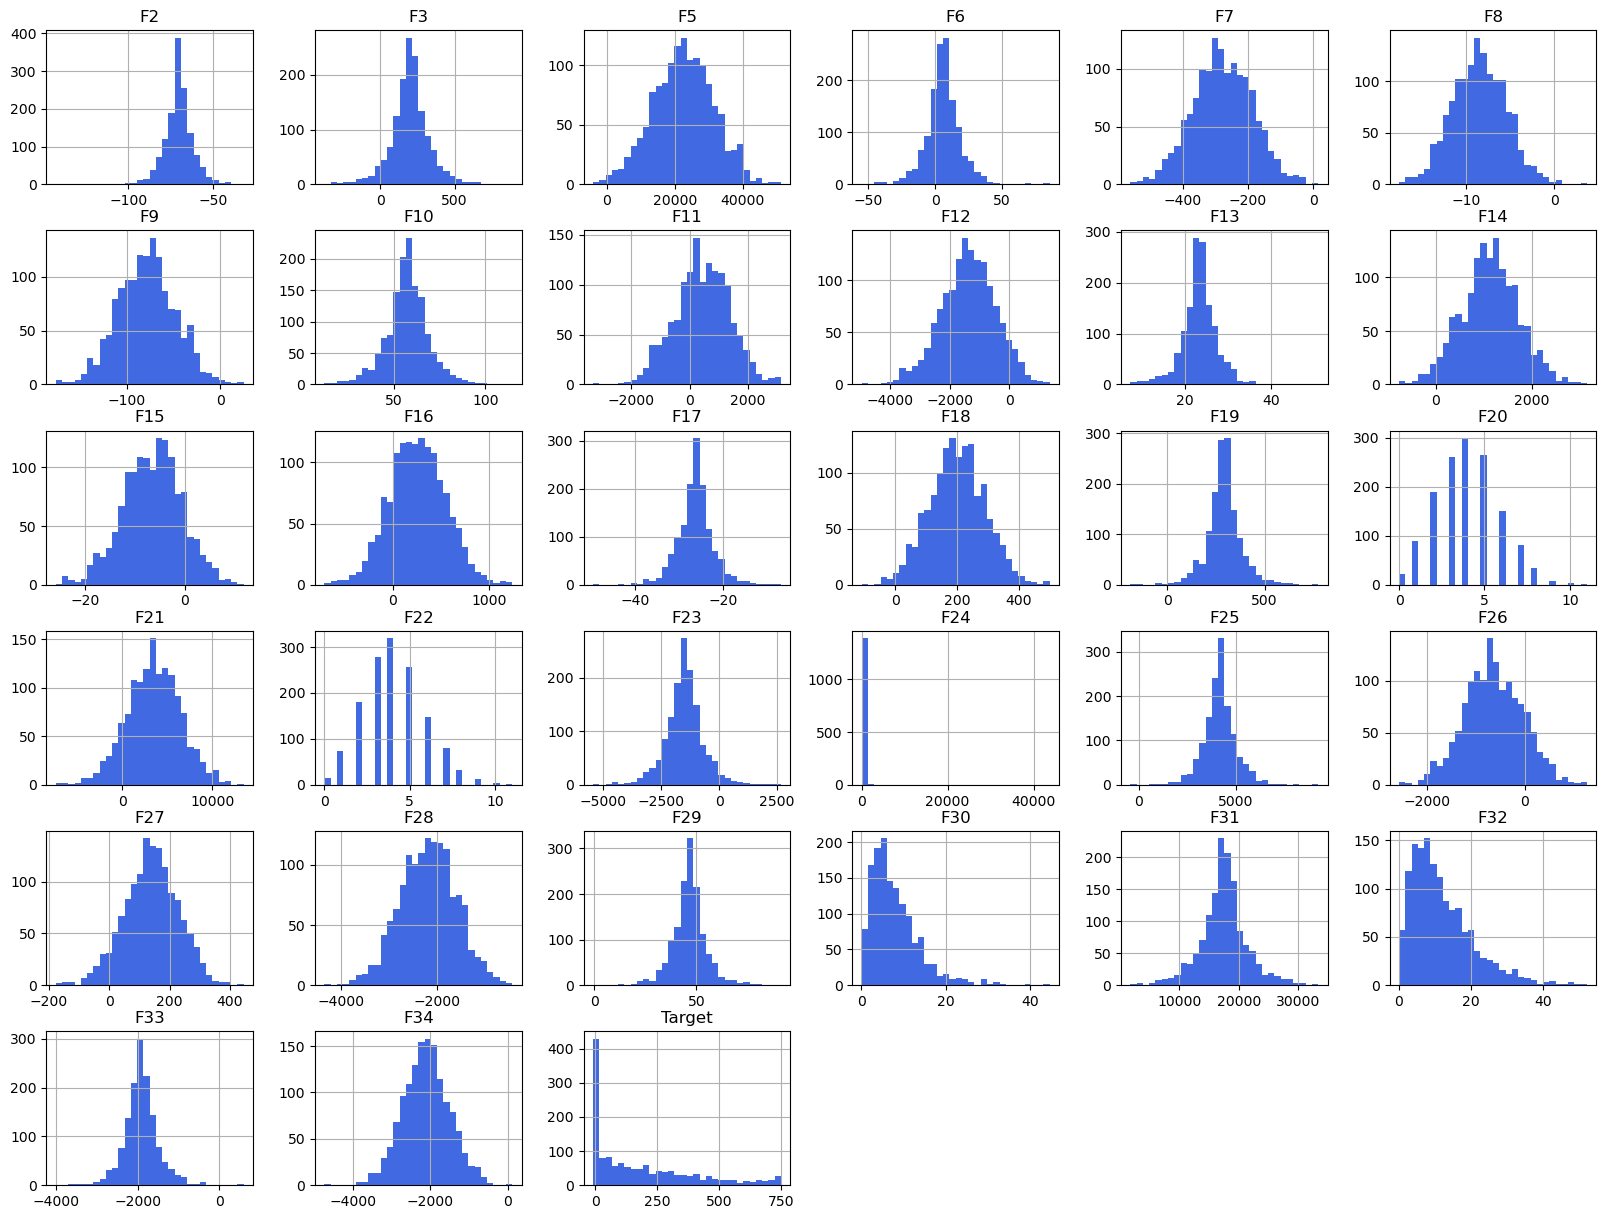

<Figure size 640x480 with 0 Axes>

In [7]:
print('Data skewness\n')
p3_dat.hist(bins=30, figsize=(20, 15), color="royalblue")
plt.figure()
plt.show()   

In [8]:
cols = ['F1', 'F4']

# Using OneHotEncoder
ohe = OneHotEncoder()
coded_cols = ohe.fit_transform(p3_dat[cols])
coded_cols_df = pd.DataFrame(coded_cols.toarray())

# Replacing the numerical values with the string values
p3_dat = pd.concat([p3_dat.drop(cols, axis=1), coded_cols_df], axis=1)

In [9]:
p3_dat.head()

,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,...,Target,0,1,2,3,4,5,6,7,8
0,-48.20,315.96,5570.88,6.27,-312.93,-16.65,-58.22,44.07,2919.36,-1988.43,...,509.59,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-75.20,162.15,6124.62,2.52,-318.66,-11.73,-53.51,70.83,-1171.56,-1734.90,...,-8.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-62.12,346.29,12506.61,-2.85,-257.34,-1.26,-79.76,65.64,-225.09,-1996.32,...,-8.93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-70.74,280.32,20098.20,9.33,-175.35,-7.31,-90.70,63.72,1604.97,-1589.97,...,22.18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-63.00,264.69,13388.76,3.30,-195.51,-6.98,-126.49,56.10,-556.32,-1704.93,...,170.98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


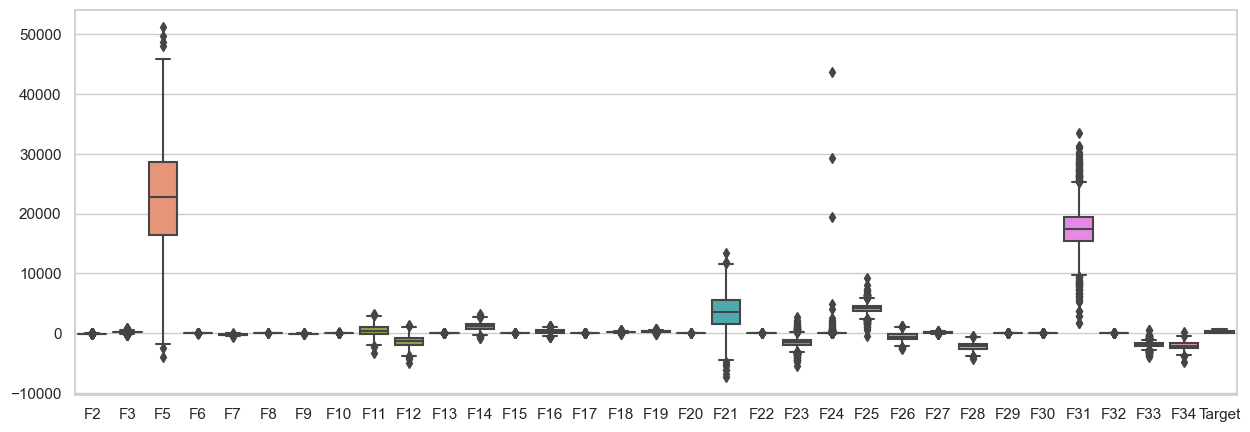

In [10]:
# Checking outliers by box plot

# filtering without the features derived from the OneHotEncoder
df_filtered = p3_dat.drop([0,1,2,3,4,5,6,7,8], axis=1) 

sns.set(style="whitegrid")
fig, axis = plt.subplots(figsize=(15,5)) 
sns.boxplot(data = df_filtered, ax=axis)
plt.show()

In [11]:
# splitting the attributes
a = p3_dat.drop('Target', axis = 1) # values of independent variable
b = p3_dat['Target'] # values of target/dependent variable

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42) # 80% training 20% test

# standardizing the values with standard scaler()
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [12]:
# independent variables

a.head()

,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,...,F34,0,1,2,3,4,5,6,7,8
0,-48.20,315.96,5570.88,6.27,-312.93,-16.65,-58.22,44.07,2919.36,-1988.43,...,-2070.68,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-75.20,162.15,6124.62,2.52,-318.66,-11.73,-53.51,70.83,-1171.56,-1734.90,...,-2539.32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-62.12,346.29,12506.61,-2.85,-257.34,-1.26,-79.76,65.64,-225.09,-1996.32,...,-716.58,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-70.74,280.32,20098.20,9.33,-175.35,-7.31,-90.70,63.72,1604.97,-1589.97,...,-2105.34,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-63.00,264.69,13388.76,3.30,-195.51,-6.98,-126.49,56.10,-556.32,-1704.93,...,-3366.82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# target variable

print(b)

0       509.59
1        -8.93
2        -8.93
3        22.18
4       170.98
         ...  
1395     11.34
1396    302.66
1397    720.39
1398    226.76
1399     -8.93
Name: Target, Length: 1400, dtype: float64


### Prediction with ML techniques

In [14]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(a_train, b_train)

# Prediction using the trained data
b_pred = linreg.predict(a_test)

# model evaluation
LinReg_accuracy = r2_score(b_test, b_pred)
print("Linear Regression Accuracy:",LinReg_accuracy)

# mean squared error value
LRmse = mean_squared_error(b_test, b_pred)
print("Mean Squared Error: ", LRmse)

# mean absolute error value
LRmae = mean_absolute_error(b_test, b_pred)
print("Mean absolute error: ", LRmae)

Linear Regression Accuracy: 0.7695699255990491
Mean Squared Error:  10801.044025018162
Mean absolute error:  78.91593169936525


In [15]:
# Support vector Machine
svm = SVR(kernel='linear')

# fitting the model with training data
svm.fit(a_train, b_train)

# prediction
b_pred = svm.predict(a_test)

# model evaluation
svm_accuracy = r2_score(b_test, b_pred)
print("SVM Accuracy: {}".format(svm_accuracy))

# mean squared error value
SVmse = mean_squared_error(b_test, b_pred)
print("Mean Squared Error: ", SVmse)

# mean absolute error value
SVmae = mean_absolute_error(b_test, b_pred)
print("Mean absolute error: ", SVmae)

SVM Accuracy: 0.728699111147104
Mean Squared Error:  12716.798586923504
Mean absolute error:  81.93911146904689


In [16]:
# Random Forest

rfr = RandomForestRegressor(random_state=42)

rfr.fit(a_train, b_train)

b_pred = rfr.predict(a_test)

# model evaluation
rfr_accuracy = r2_score(b_test, b_pred)
print("Random Forest Regressor Accuracy: {}".format(rfr_accuracy))

# mean squared error value
RFmse = mean_squared_error(b_test, b_pred)
print("Mean Squared Error: ", RFmse)

# mean absolute error value
RFmae = mean_absolute_error(b_test, b_pred)
print("Mean absolute error: ", RFmae)

Random Forest Regressor Accuracy: 0.7131314134998175
Mean Squared Error:  13446.509706852821
Mean absolute error:  89.99474249999999


In [17]:
# GradientBoosting Model
gb = GradientBoostingRegressor()

gb.fit(a_train, b_train)

b_pred = gb.predict(a_test)

# model evaluation
gb_accuracy = r2_score(b_test, b_pred)
print("GB Model Accuracy: {}".format(gb_accuracy))

# mean squared error value
GBmse = mean_squared_error(b_test, b_pred)
print("Mean Squared Error: ", GBmse)

# mean absolute error value
GBmae = mean_absolute_error(b_test, b_pred)
print("Mean absolute error: ", GBmae)

GB Model Accuracy: 0.8390269101057206
Mean Squared Error:  7545.358110530312
Mean absolute error:  66.61661306397649


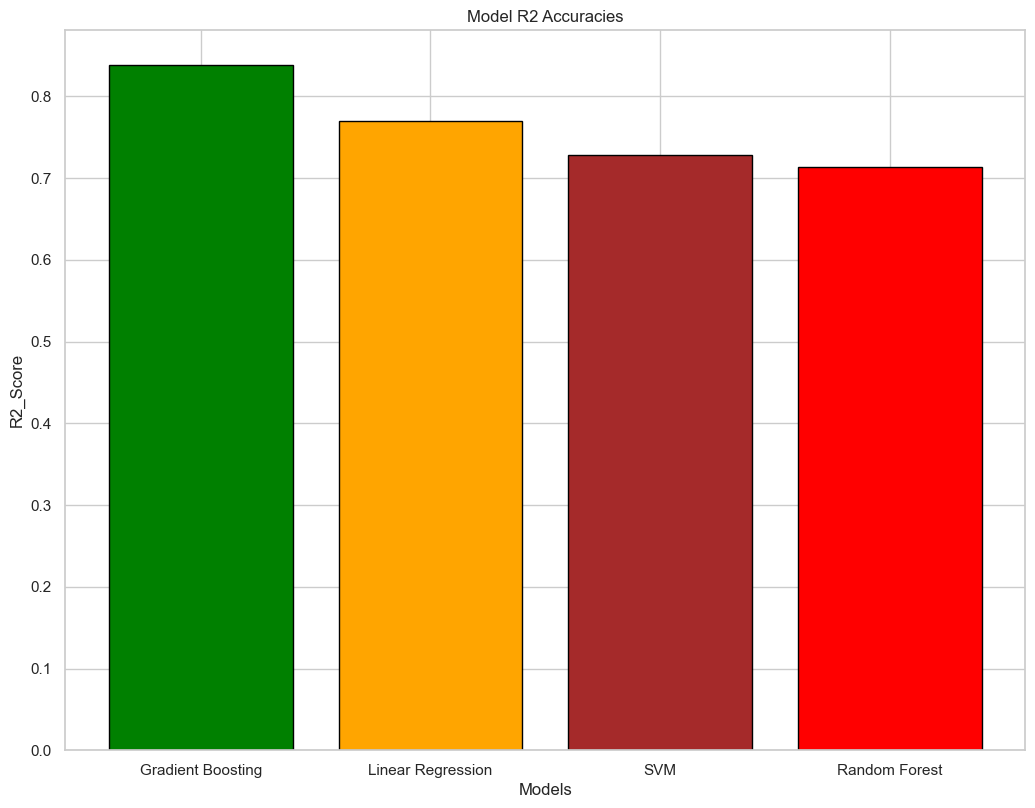

In [18]:
# visualizing the results

models = ["Gradient Boosting", "Linear Regression","SVM","Random Forest"]
accuracies = [gb_accuracy, LinReg_accuracy, svm_accuracy, rfr_accuracy]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Model R2 Accuracies')
axis.set_xlabel('Models')
axis.set_ylabel('R2_Score')
axis.bar(models,accuracies, color=["green", "orange", "brown","red"], edgecolor='black')
plt.show()

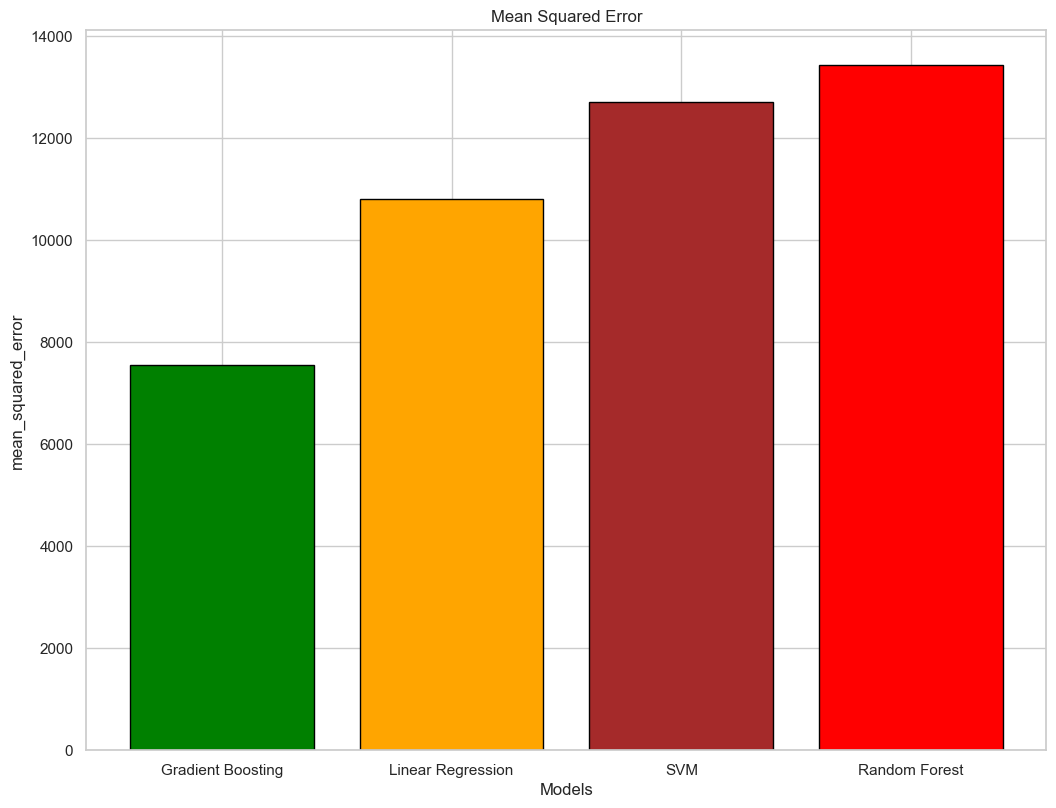

In [19]:
# visualizing the results

models = ["Gradient Boosting", "Linear Regression","SVM","Random Forest"]
accuracies = [GBmse, LRmse, SVmse, RFmse]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Mean Squared Error')
axis.set_xlabel('Models')
axis.set_ylabel('mean_squared_error')
axis.bar(models,accuracies, color=["green", "orange", "brown","red"], edgecolor='black')
plt.show()

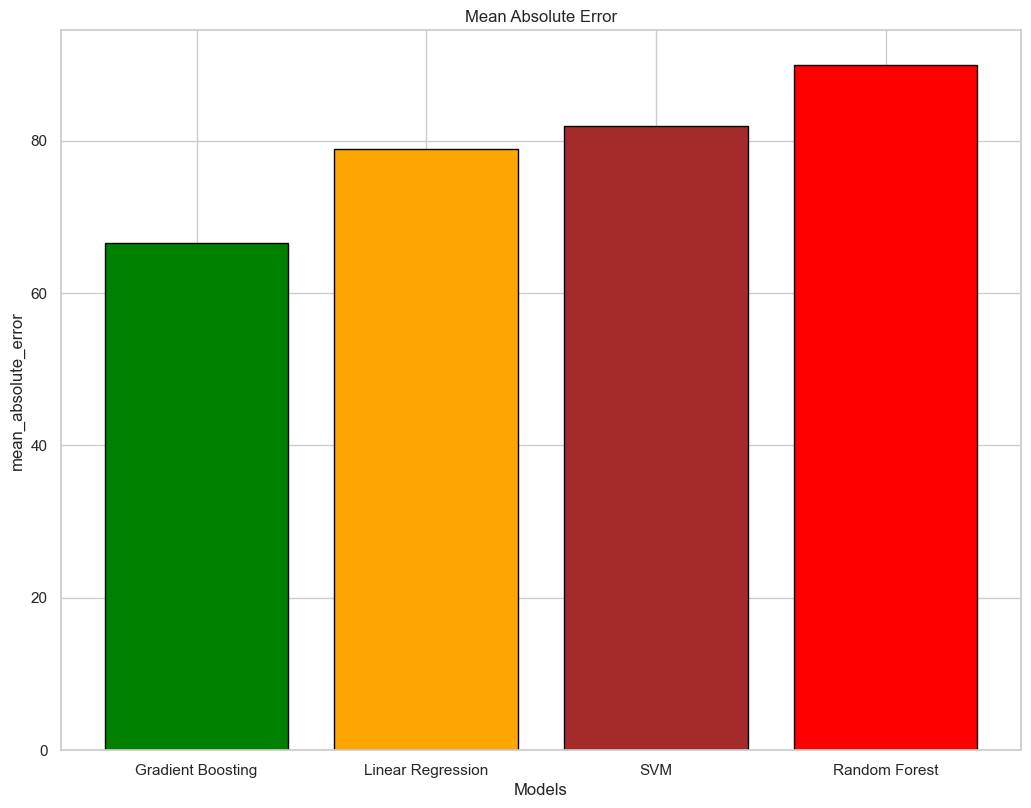

In [20]:
# visualizing the results

models = ["Gradient Boosting", "Linear Regression","SVM","Random Forest"]
accuracies = [GBmae, LRmae, SVmae, RFmae]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Mean Absolute Error')
axis.set_xlabel('Models')
axis.set_ylabel('mean_absolute_error')
axis.bar(models,accuracies, color=["green", "orange", "brown","red"], edgecolor='black')
plt.show()

### Part B

In [21]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

cols1 = ['F1', 'F4']
# Using OneHotEncoder
coded_cols1 = ohe.fit_transform(test_data[cols1])
coded_cols_df1 = pd.DataFrame(coded_cols1.toarray())

# Replacing the numerical values with the string values
test_data = pd.concat([test_data.drop(cols1, axis=1), coded_cols_df1], axis=1)

scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data)

# Using the best performed model - GradientBoosting
predicted = gb.predict(test_data_scaled) # CHANGED HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])

In [22]:
# Calculating the amount of patients with high risk of diabetes with glucose value

tested_df = pd.read_csv('CE802_P3_Test_Predictions.csv')
count = tested_df[tested_df['Target'] > 125]['Target'].count()
print("Number of patients with high risk of developing diabetes are:", count)

Number of patients with high risk of developing diabetes are: 777
